In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data preparation

In [2]:
df = pd.read_csv('churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [4]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [5]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [6]:
#Total charges lookes like number but it obj , so we need to convert it to number
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [7]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [8]:
df.totalcharges.isnull().sum()

11

In [9]:
#Fill the nan value with zero
df.totalcharges = df.totalcharges.fillna(0)

In [10]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [11]:
#Convert the yes and no to 1 and 0
df.churn = (df.churn == "yes").astype(int)

In [12]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

## Setting the Validation framework

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=1)

In [15]:
len(df_full_train), len(df_test)

(5634, 1409)

In [16]:
#Get 20% of original df in 80% on the new df
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) 

In [17]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

y_train

array([0, 0, 1, ..., 1, 0, 1])

In [20]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## EDA
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [21]:
df_full_train = df_full_train.reset_index(drop=True)

In [22]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [23]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [24]:
df_full_train.churn.mean() # cvalled the chrun rate

0.26996805111821087

In [25]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [26]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

In [27]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance: Churn rate and risk ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable

- Churn rate
- Risk ratio
- Mutual information - later

#### churn rate

In [28]:
global_mean = df_full_train.churn.mean()
round(global_mean, 3)

0.27

In [29]:
# Getting both the churm rate and the risk ratio for each group
df_group = df_full_train.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [30]:
from IPython.display import display

In [31]:
global_mean = df_full_train.churn.mean()
global_mean

0.26996805111821087

In [32]:
for col in categorical:
    print(col)
    df_group = df_full_train.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)
    print()
    print()

gender


,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980




seniorcitizen


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208




partner


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472




dependents


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651




phoneservice


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412




multiplelines


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948




internetservice


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201




onlinesecurity


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570




onlinebackup


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660




deviceprotection


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480




techsupport


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390




streamingtv


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328




streamingmovies


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182




contract


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730




paperlessbilling


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560




paymentmethod


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


###  Mutual 
This tell us how much we learn about a variable given the value of another e,g how much is contarct people likely to churn knowing their varible

In [33]:
from sklearn.metrics import mutual_info_score

In [34]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [35]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [36]:
#Let get the mutual score for all the categorical variable
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [37]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Effcet of Numerical variable on Churn

In [38]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

## One-Hot Encoding
This is a process of encoding categorical varibles into numerical
we can impliment this using sklearn

In [39]:
from sklearn.feature_extraction import DictVectorizer

In [40]:
train_dic = df_train[categorical + numerical].to_dict(orient='records')

In [41]:
train_dic[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [42]:
dv = DictVectorizer(sparse=False)

In [43]:
dv.fit(train_dic)

DictVectorizer(sparse=False)

In [44]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [45]:
dv.transform(train_dic).shape

(4225, 45)

In [46]:
#Instead of the above we can fit and transform simutaneouslly

X_train = dv.fit_transform(train_dic)
X_train.shape

(4225, 45)

In [47]:
val_dic = df_val[categorical + numerical].to_dict(orient='records')

In [48]:
X_val = dv.transform(val_dic)

In [49]:
#Let try to get the feel of sigmoid use in logistic regression
def sigmoid(z):
    return 1 /(1 + np.exp(-z))

In [50]:
z = np.linspace(8, -8, 60)

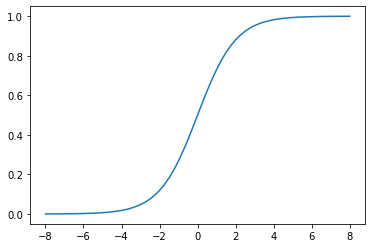

In [51]:
plt.plot(z, sigmoid(z))

## Training logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [54]:
model.coef_[0]

array([ 4.74742244e-01, -1.74872276e-01, -4.07549130e-01, -2.96879466e-02,
       -7.79912157e-02,  6.26827101e-02, -8.89710984e-02, -8.13907740e-02,
       -3.43104357e-02, -7.33687266e-02, -3.35212544e-01,  3.16504481e-01,
       -8.89710984e-02,  3.67454072e-03, -2.58136342e-01,  1.41443373e-01,
        9.01380607e-03,  6.25300415e-02, -8.89710984e-02, -8.12381054e-02,
        2.65585041e-01, -8.89710984e-02, -2.84293105e-01, -2.31201462e-01,
        1.23522300e-01, -1.66024544e-01,  5.83453812e-02, -8.70089395e-02,
       -3.20569658e-02,  7.04817894e-02, -5.90950464e-02,  1.41443373e-01,
       -2.49122536e-01,  2.15474913e-01, -1.20367041e-01, -8.89710984e-02,
        1.01658977e-01, -7.08956091e-02, -8.89710984e-02,  5.21875452e-02,
        2.13377987e-01, -8.89710984e-02, -2.32086051e-01, -7.04086188e-02,
        3.82407141e-04])

In [55]:
y_pred = model.predict_proba(X_val)[:, 1]

In [56]:
churn_decision = (y_pred >= 0.5)
churn_decision

(y_val == churn_decision)

array([ True,  True,  True, ...,  True,  True,  True])

In [57]:
#Cgheck for the accuracy of our model prediction
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = y_val == churn_decision

df_pred

,probability,prediction,actual,correct
0,0.008996,0,0,True
1,0.204524,0,0,True
2,0.212223,0,0,True
3,0.543045,1,1,True
4,0.213785,0,0,True
...,...,...,...,...
1404,0.313670,0,0,True
1405,0.039358,0,1,False
1406,0.136388,0,0,True
1407,0.799769,1,1,True


In [58]:
df_pred.correct.mean()

0.8034066713981547

## Model Interpretation

In [59]:
#Let get the weight of each feature
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [60]:
subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'tenure',
 'totalcharges']

In [61]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [62]:
model_small.intercept_[0]

-0.05356585031320426

In [63]:
dict(zip(dv_small.get_feature_names(), model_small.coef_[0].round(3)))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.495,
 'contract=one_year': -0.197,
 'contract=two_year': -0.351,
 'tenure': -0.116,
 'totalcharges': 0.001}

In [64]:
val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

In [65]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

## Using the model

In [66]:
dict_full_train = df_full_train[categorical + numerical].to_dict(orient="records")

In [67]:
dv =  DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)

In [68]:
y_full_train = df_full_train.churn.values

In [69]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_full_train, y_full_train)

LogisticRegression(random_state=1, solver='liblinear')

In [70]:
dict_test = df_test[categorical + numerical].to_dict(orient="records")

In [71]:
X_test = dv.transform(dict_test)

In [72]:
y_pred = model.predict_proba(X_test)[:, 1]

In [73]:
churn_decision = y_pred >= 0.5

In [74]:
#Check for the accuracy
(churn_decision == y_test).mean()

0.808374733853797

In [90]:
#using the model
customer = dict_test[-1]
small = dv.transform([customer])

In [91]:
model.predict_proba(small)

array([[0.37780162, 0.62219838]])

In [92]:
y_test[-1]

1